In [1]:
import os
import sys
sys.path.append('../')
# from deephive.environment.optimization_functions.test_functions import CEC17
from deephive.environment.commons.objective_functions import *
import numpy as np
from deephive.environment.deephive_utils import *
from deephive.environment.utils import *
from deephive.exploration.gp_surrogate import GPSurrogateModule
from deephive.environment.utils import filter_points
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt
from experiments.run_experiment2 import *
from deephive.environment.optimization_functions.test_functions import CEC17
from sko.PSO import PSO

Using device: cpu


In [2]:
# #Experiment 1: VARIANCE DRIVEN EXPLORERS AND EXPLOITERS
config_path = "../config/exp_config.json"
model_path = "../models/pbest_unfreeze.pth"
model_path_2 = "../models/gbest.pth"

config = parse_config(config_path)

In [3]:
exp_num = 209
iters = 10
exp_name = "exp_" + str(exp_num)
result_path = 'experiments/results/' + exp_name + '/'
os.makedirs(result_path, exist_ok=True)
title = "PSO"

config['freeze'] = True
config['use_gbest'] = True
config['role_std'] = {'explorer': 0.5, 'exploiter': 0.02}
config['variable_std'] = False
config['action_std'] = 0.3
config['decay_rate'] = 0.99
config['n_agents'] = 10
config['n_dim'] = 2
config['decay_std'] = False
config['decay_start'] = 0
config['split_agents'] = True
config['split_type'] = "use_stds"
config['plot_gbest'] = True
config['use_optimal_value'] = False
config['layer_size'] = [16, 16]
config['iters'] = iters
config['tol'] = 0
config['objective_function'] = "CEC17"
mode = "test"
config["negative"] = True
config["function_id"] = 1
config["use_grid"] = False

config['w'] = 0.7298
config['c1'] = 1.49816
config['c2'] = 1.49816
config['ep_length'] = 20

env, agent_policies = initialize(config, mode=mode, model_path=[model_path, model_path_2])
pbest_policy = agent_policies[0]
gbest_policy = agent_policies[1]
opt_value = env.objective_function.optimal_value(dim=env.n_dim)
# run_experiment(env, pbest_policy, config, exp_name)
# objective_function = lambda x: -env.objective_function.evaluate(np.array([x]).reshape(1, -1))[0]
# lower_bound, upper_bound = env.objective_function.bounds(dim=env.n_dim)[0].tolist(), env.objective_function.bounds(dim=env.n_dim)[1].tolist()

# algorithm = PSO(func=objective_function, n_dim=env.n_dim, pop=config['n_agents'], max_iter=config['ep_length'], lb=lower_bound, ub=upper_bound,
#                         w = config['w'], c1 = config['c1'], c2 = config['c2'])
# run_experiment_other_algorithm(algorithm, env, config, exp_name, title=title)

Loaded policy from:  ../models/pbest_unfreeze.pth
Loaded policy from:  ../models/gbest.pth


In [4]:
obs, obs_std = env.reset()
policy = pbest_policy

In [10]:
split_ratio = 1
explorers_id = np.random.choice(env.n_agents, int(env.n_agents * split_ratio), replace=False)
exploiters_id = np.setdiff1d(np.arange(env.n_agents), explorers_id)
print(f"Explorers: {explorers_id}, Exploiters: {exploiters_id}")

roles = np.zeros(env.n_agents)
roles[exploiters_id] = 1

Explorers: [3 2 0 9 5 4 8 1 7 6], Exploiters: []


In [11]:
roles[[]] = 1

In [5]:
actions = get_action(obs, policy, env, obs_std)

In [ ]:
print(actions.shape)
actions = actions.reshape(-1, env.n_dim)
print(actions.shape)

In [6]:
_ = env.step(actions)

In [ ]:
actual_state = env._get_actual_state()

In [ ]:
params = actual_state[:, :env.n_dim]
params.shape

In [ ]:
f10 = CEC17(11)

In [ ]:
f10.evaluate(params)

In [2]:
def bent_cigar(x: np.ndarray) -> np.ndarray:
    sm = np.sum(x[:, 1:] * x[:, 1:], axis=1)
    sm = sm * 10e6
    return x[:, 0]*x[:, 0] + sm

def bent_cigar_2(x):
    '''Bent Cigar

    Parameters
    ----------
    x : list

    Returns
    -------
    float

    Notes
    -----
    global minimum: f(x*)=0 at x*=(0,...,0)
    bounds: x_i in [-100,100] for i=1,...,n

    References
    ----------
    https://al-roomi.org/benchmarks/unconstrained/n-dimensions/164-bent-cigar-function
    '''

    return x[0]**2 + 1e6*sum([v**2 for v in x[1:]])

In [1]:
from deephive.environment.optimization_functions.cec2017.basic import * 
from deephive.environment.optimization_functions.cec2017.functions import all_functions as functions
from deephive.environment.optimization_functions.cec2017.transforms import *
import numpy as np
from deephive.environment.optimization_functions.cec2017 import utils

In [2]:
# generate random parameters
def generate_random_parameters(dim, lower_bound, upper_bound, n):
    return np.random.uniform(lower_bound, upper_bound, (n, dim))

params = generate_random_parameters(2, -100, 100 , 5)
nx = params.shape[1]
shift = shifts[0][:nx]
rotate = rotations[nx][0]
# print(shift, rotate)
param_transformed = shift_rotate(params, shift, rotate)
print(param_transformed)
print(params, nx)


[[ 46.38157715 160.75930157]
 [-40.09768648  17.15309242]
 [  4.74913276 130.4389899 ]
 [-34.70727533 150.96446029]
 [-24.96098689  43.30566967]]
[[-33.82325438  95.50586853]
 [-11.66446314 -70.657889  ]
 [ -7.70328478  51.11748138]
 [ 36.66297585  54.23805708]
 [-15.13817593 -40.64105554]] 2


In [3]:
print(bent_cigar(param_transformed))
print(functions[0](params))
print(bent_cigar(params))

[2.58435533e+11 2.94228740e+09 1.70143301e+11 2.27902684e+11
 1.87538109e+10]
[-2.58435533e+11 -2.94228750e+09 -1.70143301e+11 -2.27902684e+11
 -1.87538110e+10]
[9.12137104e+10 4.99253729e+10 2.61299691e+10 2.94176697e+10
 1.65169542e+10]


In [4]:
bent_cigar(np.array([[0.01,0.1]]))

array([100000.0001])

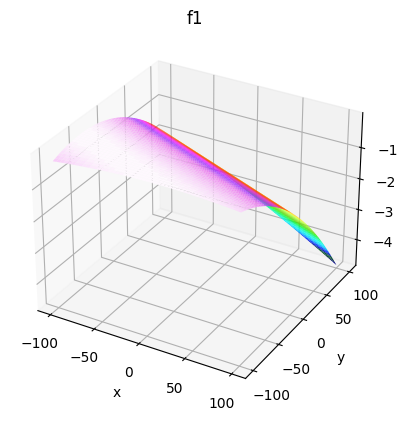

In [8]:
utils.surface_plot(functions[0], domain=[-100, 100], points=1000, dimension=2)

In [10]:
functions[0](params)

array([-4.37119148e+10, -9.42225199e+10, -6.68701472e+09, -3.30228864e+10,
       -1.22583104e+11])

In [11]:
opt_param = np.array([shifts[0][:2]])
opt_param

array([[-55.2763985 , -70.42955972]])

In [12]:

functions[0](opt_param)

array([-100.])

In [ ]:
opt

In [56]:

opt_param = np.array([[0.1, 2]])
bent_cigar(opt_param)


array([40000000.01])